In [89]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.dates as mdates

plt.style.use('ggplot')

## ROC Curve

In [35]:
def plot_ROC(data_select_list, model_details):    
    
    plt.rcParams["figure.figsize"] = (6,6)
    fig = plt.figure()
    axs = fig.subplots(1, 1)
    lw = 2
    
    for model_name, model_text, asset_id,  in data_select_list:
        fpr_tpr = []
        fpr_list = []
        tpr_list = []
        for asset_result in model_details[model_name][asset_id]:
            TP = asset_result['metric_result']['TP']
            FN = asset_result['metric_result']['FN']
            FP = asset_result['metric_result']['FP']
            TN = asset_result['metric_result']['TN']
            tpr =  TP / (TP + FN)
            fpr = FP / (FP + TN)
            
            parameter = asset_result['parameter']

            fpr_tpr.append([fpr, tpr, parameter])
            

        df = pd.DataFrame(fpr_tpr, columns=['fpr','tpr', 'parameter'])
        df = df.sort_values('fpr')
        df['cummax'] = df['tpr'].cummax()
        df = pd.concat([df, df.iloc[-1:]])
        df.iloc[-1,0] = 1
        
        axs.plot(
            df['fpr'],
            df['cummax'],
            '--',
            lw=lw,
            label=f"{model_text}",
        )
            
    axs.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--", label="Base Line")
    axs.set_xlim([-0.01, 1.])
    axs.set_ylim([0.0, 1.02])
    axs.set_xlabel("False Positive Rate", fontsize=15)
    axs.set_ylabel("True Positive Rate", fontsize=15)
    axs.set_title("Receiver operating characteristic", fontsize=17)
    axs.legend(loc="lower right", prop={'size': 14})

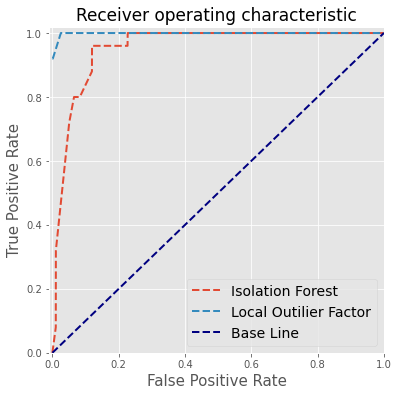

In [36]:
with open('output/model_details_ROC.pickle', 'rb') as handle:
    model_details_ROC = pickle.load(handle)
    
    plot_data = [
        ('isolation_forest', 'Isolation Forest', 5),
        ('local_outilier', 'Local Outilier Factor', 5)
    ]
    plot_ROC(plot_data, model_details_ROC)

## Visualization of Predict 

In [2]:
# with open('model_details_backup.pickle', 'rb') as handle:
#     model_details = pickle.load(handle)    
mode_details = model_details_ROC

In [8]:
best_model = {
    1: 0,
    2: 0,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 1,
    8: 1,
    9: 1,
}

In [32]:
data.iloc[0].datetime

Timestamp('2022-08-08 00:00:00')

In [41]:
data[data['datetime'] > '2022-08-12']

,datetime,hour,weekday,A,C,P,n_request,abnormal,predict
34561,2022-08-12 00:00:10,0,4,0.0,170,0.014897,184,0.0,0
34562,2022-08-12 00:00:20,0,4,0.0,146,0.014897,160,0.0,0
34563,2022-08-12 00:00:30,0,4,0.0,57,0.014897,71,0.0,0
34564,2022-08-12 00:00:40,0,4,0.0,120,0.014897,134,0.0,0
34565,2022-08-12 00:00:50,0,4,0.0,197,0.014897,211,0.0,0
...,...,...,...,...,...,...,...,...,...
60476,2022-08-14 23:59:20,23,6,0.0,168,0.010365,178,0.0,0
60477,2022-08-14 23:59:30,23,6,0.0,93,0.010365,103,0.0,0
60478,2022-08-14 23:59:40,23,6,0.0,140,0.010365,150,0.0,0
60479,2022-08-14 23:59:50,23,6,0.0,72,0.010365,82,0.0,0


In [300]:
def show_predict_model(model_details, best_model, model_name):
    plt.rcParams["figure.figsize"] = (15,25)
    fig = plt.figure()
    fig.suptitle('Prediction visualization of best model in each asset (Local Outilier Factor)',y=0.91,x=0.5, fontsize=15)
    axes = fig.subplots(9, 2)
    
    cols_text = ['{}'.format(col) for col in ['Ground Truth', 'Prediction']]
    rows_text = ['Asset {}'.format(row) for row in range(1,10)]   
    
    for asset in range(1,10):
        row = asset - 1
        data = model_details[model_name][asset][best_model[asset]]['predict']
        F1 = model_details[model_name][asset][best_model[asset]]['metric_result']['F1']
        data = data[(data['datetime'] > '2022-08-12 18:00:00') & (data['datetime'] < '2022-08-14 06:00:00')]

        ground_truth_normal = data[data['abnormal'] == 0]
        ground_truth_abnormal = data[data['abnormal'] == 1]
        axes[row][0].set_ylim([0, 500])
        axes[row][0].plot(ground_truth_normal['datetime'], ground_truth_normal['n_request'],'b-',label='normal')
        axes[row][0].plot(ground_truth_abnormal['datetime'], ground_truth_abnormal['n_request'],'r.',label='abnormal')
        axes[row][0].legend()
        
        
        
        predict_normal = data[data['predict'] == 0]
        predict_abnormal = data[data['predict'] == 1]
        
        axes[row][1].set_ylim([0, 500])
        axes[row][1].plot(predict_normal['datetime'], predict_normal['n_request'],'b-',label='normal')
        axes[row][1].plot(predict_abnormal['datetime'], predict_abnormal['n_request'],'r.',label='abnormal')
        axes[row][1].legend()
        
        axes[row][1].text(1.13, 
                0.3,
                f'F1={F1}',
                horizontalalignment='center',
                verticalalignment='center',
                transform=axes[row][1].transAxes,
                fontsize=13
        )
    
    
    plt.gcf().autofmt_xdate()
    axes[8][0].set_ylabel("Average number of request/second", y=5, x=1, fontsize=15) # , weight="bold"
    axes[8][0].set_xlabel("Time", y=0.4, x=1.1, fontsize=15)
    
    # add title to column
    for ax, col_text in zip(axes[0], cols_text):
        ax.set_title(col_text, ha='right', va='center',y=1.1,x=0.65, fontsize=13)
        
    # add asset name to row    
    for ax, row_text in zip(axes[:,1], rows_text):
        ax.text(1.1, 
                0.5,
                row_text,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes,
                fontsize=13
        )

    plt.plot()    


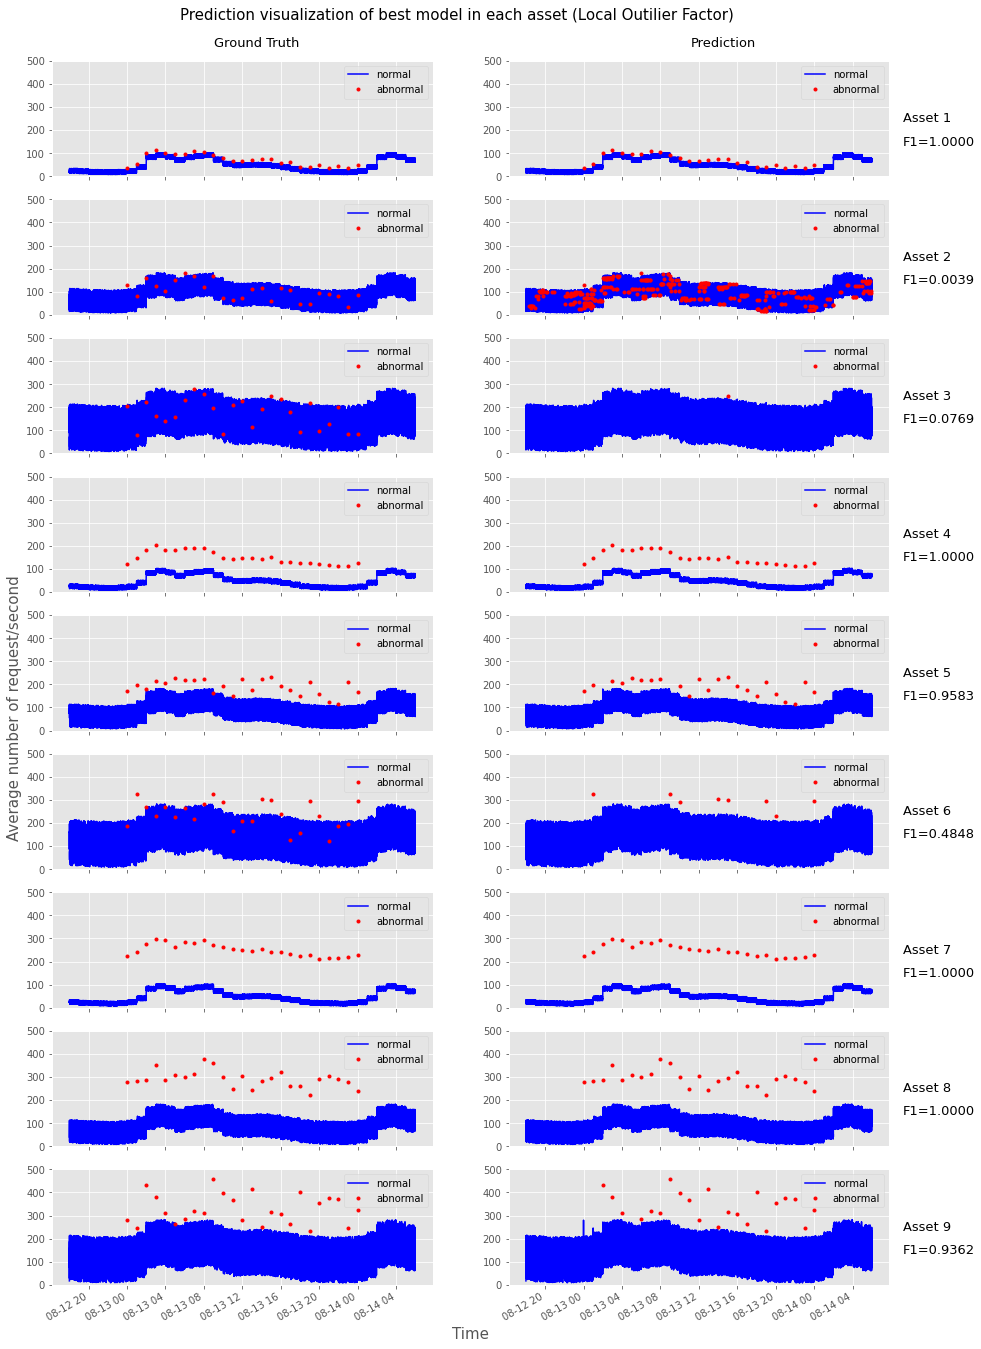

In [301]:
show_predict_model(model_details, best_model, 'local_outilier')